## Lab 3 Report

Author names go here 

Michael Lee, David Yu, Wengjie Ma

(This should be a markup cell, which means that when you run it you just get formated text.)

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
# import whatever other modules you use in this lab -- there are more that you need than we've included 
import decimal
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa


Assignment 1 - Convolving Signals

/Users/JackMa/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


<IPython.core.display.Javascript object>


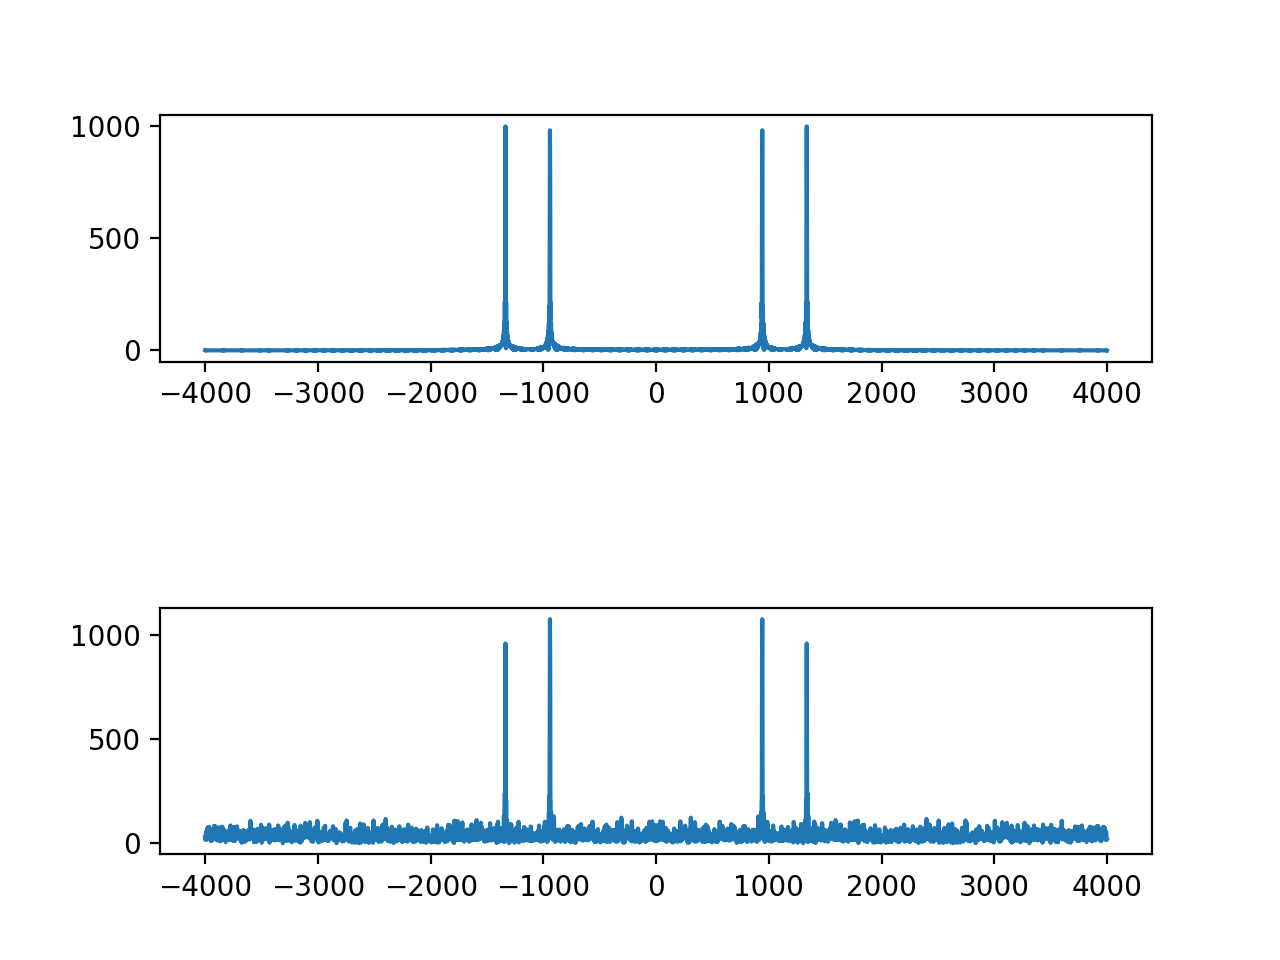

1364
1566
2530
2732


In [9]:
#Assignment 1
# A
fs = 8000
t = np.arange(0,0.25,1/fs)
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)

d02 = 2000*np.concatenate([d0, np.zeros(int(0.5*fs)), d0])

play_obj = sa.play_buffer(d02.astype('int16'),1,2,fs)
play_obj.wait_done()

N = 4096
d0_ft = np.abs(np.fft.fft(d0,N))
d0_fts = np.fft.fftshift(d0_ft)
f = np.arange(int(-fs/2),int(fs/2), fs/N)

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 0.35)

plt.subplot(2,1,1)
plt.plot(f, d0_fts)

ind = np.arange(len(d0_fts))
b = ind[d0_fts[ind] > 900] # b = [1,4]
for t in b:
    if(t > 0):
        print(t)
        
n = np.random.normal(0,1,len(d0))
d0n = d0 + n
d0n_ft = np.abs(np.fft.fft(d0n, N))
d0n_fts = np.fft.fftshift(d0n_ft)
plt.subplot(2,1,2)
plt.plot(f, d0n_fts)

Discussion

Changing fs changes the height of the delta function. When convoluting, it lowers the number of convolutions and therefore lowers the accuracy of the overall convolution. The systems are shifting the graphs. 

Assignment 2

In [ ]:
def classify(x,fs):
    tone_freqs = [[697,770,852,941],[1209,1336,1477]]
    

Discussion
 
If you don't normalize the convolution then y(t) is very small (1 tall compared to 25000). However, if you also make the impulse only 1 tall instead of fs tall, you can compensate and y(t) will be normal again. This is because fs is a really small number, so if you don't divide by fs then the graph will be very small. y(t) would sound very quiet compared to the original. 

Assignment 3

In [10]:
fs = 8000

file = open("receivedmsg.csv")
rm = np.loadtxt(file, delimiter=',')

with open("receivedmsg.csv") as myfile:
    rm = csv.reader(myfile, delimiter='',quoting=csv)

TypeError: "quoting" must be an integer

Discussion

S1 is Buzz Lightyear from Toy Story. KaChow